# InstaBot 2

In [19]:
# importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
driver = webdriver.Chrome('chromedriver.exe')

In [20]:
# login
def login():
    driver.get("https://www.instagram.com/")
    time.sleep(2)
    user_name_textbox = driver.find_element_by_name("username")
    user_name_textbox.send_keys("interestingfacts2104@gmail.com")
    password_textbox = driver.find_element_by_name("password")
    password_textbox.send_keys("codingninjas21")
    driver.find_element_by_class_name("qF0y9").click()
    time.sleep(3)
    
    try:
        driver.find_element_by_class_name("L3NKy").click()    
        time.sleep(2)
        
        popup2 = driver.find_element_by_class_name("aOOlW")
        if popup2.is_enabled:
            popup2.click()
         
        
    except NoSuchElementException:
        pass


In [21]:
login()

# 1. Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.

### 1.1 From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [44]:
def text_box(search_text):
    text_box = driver.find_element_by_class_name("XTCLo")
    text_box.clear()
    text_box.send_keys(search_text)

In [45]:
def open_profile(profile_name):
    text_box(profile_name)
    time.sleep(3)
    driver.find_element_by_class_name("-qQT3").click()

In [49]:
def insta_handle():
    text_box('food')
    time.sleep(2)
    lst = driver.find_elements_by_class_name("-qQT3")
    insta_handles = []
    li = []
    
    for i in lst:
        if ('location' not in i.get_attribute('href')) and ('tags' not in i.get_attribute('href')):
            insta_handles.append(i)
            
    for j in insta_handles:
        li.append(j.find_element_by_class_name("_7UhW9").text)
        
    return li

In [54]:
ans = insta_handle()
new = ans[:10]
new

['foodtalkindia',
 'hey_foodies3',
 'food_lunatic',
 'streetfoodie7',
 'foodiesdelhite',
 'delhifoodguide',
 'food',
 'holybelly_foodboutique',
 'indianfoodfreak',
 'pune_food_blogger']

In [57]:
# MAIN CODE
all_followers = []
for i in new:
    open_profile(i)
    time.sleep(5)
    f = driver.find_elements_by_class_name('g47SY')[1]
    n = f.get_attribute('title').replace(',','')
    all_followers.append(int(n))
    driver.back()
    time.sleep(5)
    
new = np.array(new)
all_followers = np.array(all_followers)
new = new[np.argsort(all_followers)][::-1]
all_followers = all_followers[np.argsort(all_followers)][::-1]

for i in range(5):
    print(new[i],all_followers[i])
    

food 307456
foodtalkindia 307456
food_lunatic 124584
streetfoodie7 118286
delhifoodguide 99864


### 1.2 Number of posts these have done in Previous 3 Days

In [4]:
def text_box(search_text):
    text_box = driver.find_element_by_class_name("XTCLo")
    text_box.clear()
    text_box.send_keys(search_text)

In [5]:
def open_profile(profile_name):
    text_box(profile_name)
    time.sleep(3)
    driver.find_element_by_class_name("-qQT3").click()

In [6]:
top_handles = ['food','foodtalkindia','food_lunatic','streetfoodie7','delhifoodguide']
top_handles

['food', 'foodtalkindia', 'food_lunatic', 'streetfoodie7', 'delhifoodguide']

In [14]:
no_post = []
for i in ans1:
    open_profile(i)
    time.sleep(2)
    post = driver.find_element_by_class_name('_9AhH0')
    post.click()
    l=0
    while True:
        date = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.CLASS_NAME,'_1o9PC')))
        d = date.text.split()
        if len(d)<3 or (d[1] == 'DAYS' and int(d[0])>3):
            break;
        l+=1
        next_post = driver.find_element_by_class_name('l8mY4')
        next_post.click()
    no_post.append(l)
    close = driver.find_element_by_class_name('qJPeX')
    close.click()
    
for i in range(5):
    print(top_handles[i], no_post[i])

food 2
foodtalkindia 2
food_lunatic 3
streetfoodie7 11
delhifoodguide 4


### 1.3 Plotting the graph for above data


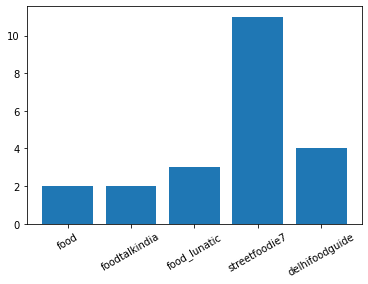

In [19]:
plt.bar(top_handles,no_post)
plt.xticks(rotation=30)
plt.show()

# 2. Your friend also needs a list of hashtags that he should use in his posts.

### 2.1 Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [7]:
top_handles = ['food','foodtalkindia','food_lunatic','streetfoodie7','delhifoodguide']
top_handles

['food', 'foodtalkindia', 'food_lunatic', 'streetfoodie7', 'delhifoodguide']

In [8]:
def text_box(search_text):
    text_box = driver.find_element_by_class_name("XTCLo")
    text_box.clear()
    text_box.send_keys(search_text)

In [9]:
def open_profile(profile_name):
    text_box(profile_name)
    time.sleep(3)
    driver.find_element_by_class_name("-qQT3").click()

In [12]:
content = []
for i in top_handles:
    open_profile(i)
    time.sleep(2)
    post = driver.find_element_by_class_name('_9AhH0')
    post.click()
    print('Posts of InstaHandle',i)
    for i in range(10):
        span = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"C4VMK")]/span')))
        content.append(span.text)
        print()
        print(str(i+1) + ".) " + span.text)
        print('----------------------------------------------------------------')
        next_post = driver.find_element_by_class_name('l8mY4')
        next_post.click()
    print()
    print('----------------------------------------------------------------------------------------')
    print()
    close = driver.find_element_by_class_name('qJPeX')
    close.click()

Posts of InstaHandle food

1.) #HotFind #burgers 🍔

Some of the best burgers you’ll find in the capital😍

Comment and tell us some good ones you’ve tried!🙌🏼
----------------------------------------------------------------

2.) We have rounded up the perfect guide of cookout essentials! Up your cookout game with these three brands @casusgrillindia , @meatigo_official and @jadeforestin

Think a sunny winter day in the outdoors, with friends gathered to catch up and it all just happens to take place over an Instagrammable table around the sound of a marinade sizzling on a ripping hot grill, perfectly-glazed meats, smoky charred vegetables and the perfect beverage to match it all!
----------------------------------------------------------------

3.) #GIVEAWAYALERT @earthen.in

We are giving 10 of you lucky people a chance to win a free day pass to the Earthen Music Festival 2021! Here’s what you need to do to win:

-Share this the post on your stories.
-Name your favourite artist on the li


4.) Hong Kong Wine & Dine Festival 2021 - a festival featuring an array of refreshing and trending food and drink experiences with a whole month of indulgence only at the culinary capital of Asia. Here we have @mr.bartrender , giving an ode to the exquisite flavors of the city of Hong Kong with his unique take on local flavors from this city and sustainability. Nitin has created "Lanterns Over Hong Kong" an eco-conscious cocktail or you could say a cocktail with a conscience, taking inspiration from the latest sustainability trend, that is not only in food and wine but also in cocktails! Here's how you prep it:
60 ml: Gin infused with Sichuan Peppercorns
30 ml:  Mandarin Orange juice
15 Lemon juice
60 ml: Black Spiced Tea
1 bar spoon: Citrus Marmalade: made with leftover Mandarin orange, lemon, and Sichuan Peppercorns
5-6 Ice cubes
Splash of Soda
Garnish: Citrus Marmalade leather
Glass: Tall
Method: Shaken
 
-Take a cocktail shaker, add Sichuan Peppercorns Infused Gin followed by fres


7.) Cooking Restaurant Style Hakka Noodles at Home with my little one.🍝🥰

Ingredients for Veg Hakka Noodles:
• 1 pack (150 gm) Ching’s Just Soak Veg Hakka Noodle.
• 1 large carrot 100gms, sliced.
• 100g cabbage, sliced.
• 100g onions, sliced.
• 1 large capsicum 200 grams, sliced – can use a mix of green and red.
• 1/2 pack Ching’s Chowmein Hakka noodle masala.
• Spring onions

Prepare the noodles :
Boil 5-6 cups of water in a Pan. Switch off the flame. Soak the noodles in water. Either pour the hot water on the noodle cake or gently put the Noodle cake in the hot water. Cover and let it stand for 5 minutes. Do not Cook/Boil the noodles. Drain the water and wash the noodles under running water. Noodles are ready!

Prepare the dish:
Heat oil in a pan. Put the chopped vegetables in the pan and stir fry it for 2 – 3 mins. Put the soaked Ching’s Just Soak Veg Hakka Noodle in the pan and then add Ching’s Secret Chowmein Hakka Noodles Masala. Mix well and stir – fry for 3 to 4 minutes. Garni


9.) Guess What in Making 😍😍 Jaldi Comment karo address Comment section main hai 😂😅
.
.
Tag karo apne sare Friends ka sath 😅😅
.

•
FOLLOW 🍴@streetfoodie7
FOLLOW 🍴@streetfoodie7
FOLLOW 🍴@streetfoodie7
•
Follow us for more foodies Updates 👇
••
Use Hashtag #streetfoodie7 to get featured!
Turn on Your Post Notifications 👈
•
#chickencurry #streetfood#chickenrecipes #food #foodtalkindia #indianfoodie #foodtraveller #foodindia #foodphotography #foodphoto #foodie #instafood #icecreams #chennaifood #chennaifoodblogger #chennaifoodie #chennai #briyani #streetfood #buzzfeast #dessert #foodblogger #biryanilove #foodblog #spicyfood #chicken #indianfood #desifood #streetfoodie7
----------------------------------------------------------------

10.) Butter Chicken OR Chicken Kadai😋😋🤤🤤
Comment your favourite one 😍
.
.

•
FOLLOW 🍴@streetfoodie7
FOLLOW 🍴@streetfoodie7
FOLLOW 🍴@streetfoodie7
•
Follow us for more foodies Updates 👇
••
Use Hashtag #streetfoodie7 to get featured!
Turn on Your Post Notificatio

### 2.2 Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [13]:
data = []
words = {}
for i in content:
    for j in i.split('/n'):
        for w in j.split():
            if '.' not in w:
                words[w] = words.get(w,0) + 1

for k,v in words.items():
    data.append([k,v])
    print(k,v)

#HotFind 8
#burgers 2
🍔 2
Some 2
of 70
the 108
best 6
burgers 2
you’ll 2
find 2
in 27
capital😍 2
Comment 8
and 95
tell 2
us 10
some 9
good 4
ones 2
you’ve 2
tried!🙌🏼 2
We 4
have 10
rounded 2
up 4
perfect 6
guide 2
cookout 4
essentials! 2
Up 2
your 17
game 2
with 49
these 8
three 2
brands 2
@casusgrillindia 2
, 4
@meatigo_official 2
@jadeforestin 2
Think 2
a 77
sunny 2
winter 2
day 4
outdoors, 2
friends 2
gathered 2
to 58
catch 2
it 13
all 4
just 3
happens 2
take 8
place 2
over 10
an 16
Instagrammable 2
table 2
around 3
sound 2
marinade 2
sizzling 2
on 35
ripping 2
hot 4
grill, 2
perfectly-glazed 2
meats, 2
smoky 2
charred 2
vegetables 3
beverage 2
match 2
all! 2
#GIVEAWAYALERT 2
are 4
giving 9
10 3
you 25
lucky 3
people 2
chance 2
win 2
free 2
pass 2
Earthen 4
Music 2
Festival 8
2021! 2
Here’s 4
what 2
need 3
do 2
win: 2
-Share 2
this 9
post 2
-Name 2
favourite 3
artist 2
line 2
-Tag 2
fellow 2
festival 10
is 13
that 10
cumulative 2
occurrence, 2
music, 2
culture 4
& 14
art 2
being 2
I

Chicken 5
Roll 2
/ 1
KG 1
Ka 1
Anda 1
ONLY 1
At 1
Shiva 1
Egg 1
300 1
/- 1
Sirsa 1
gate 1
#eggrolls 1
streetfood#egg 1
Winter 1
Special 1
Steam 1
Momos 2
🤤🤤🤤🔥🔥 1
Kisko 1
Pasand 2
Hai 3
karo 3
Treat 1
mera 1
Taraf 1
se 1
😍😍 3
Taste 1
8/10 1
₹30/- 1
📍Sector 1
Chhattisgarh 1
@streetfoodie7 1
#momos 1
#momo 1
#streetfoodindia 1
#foodbossindia 1
#zingyzest 1
#buzzfeedfood 1
#Desi 1
#chickenlover 1
#bhilaians 1
#foodies 1
#chinesefood 1
TAG 1
YOUR 1
KFC 1
LOVER 1
GIRL 1
FRIEND❤️😍 1
Bucket 1
499/- 1
#india 1
#kfcchicken 1
#streetfood#chickenlover 1
DRUMSTICKS 1
🍗🍗🍗🍗🍗🍗 1
Partner 1
😋😋 1
#nonveglovers 1
#streetfood#mumbaifoodie 1
#kolkatablogger 1
Guess 1
What 1
Making 2
Jaldi 1
address 1
section 1
main 1
hai 1
😂😅 1
apne 1
sare 1
ka 1
sath 1
😅😅 1
#chickencurry 1
#streetfood#chickenrecipes 1
Butter 1
OR 1
Kadai😋😋🤤🤤 1
😍 1
#butterchicken 1
#streetfood#butter 1
BHEL 1
Puri 1
Kis 2
Ko 1
Hai? 1
Siyaram 1
chole 1
kulche 1
wala 1
Lajpat 1
Nagar, 1
New 1
Billu 1
Omelette 1
Point 1
@ 2
Subhash 1
Nagar 1
!

### 2.3 Create a csv file with two columns : the word and its frequency

In [14]:
df = pd.DataFrame(data, columns = ['Words','Frequency'])
df.to_csv('words.csv',index = False)
df

,Words,Frequency
0,#HotFind,8
1,#burgers,2
2,🍔,2
3,Some,2
4,of,70
...,...,...
996,Food,1
997,Kiya,1
998,Bharwan,1
999,Golgappe,1


### 2.4 Now, find the hashtags that were most popular among these bloggers

In [16]:
hashtags = []
for w in words:
    if w[0] == '#':
        hashtags.append([words[w],w])
        
hashtags.sort(reverse = True)
for i in hashtags:
    print(i[1],i[0])

#streetfoodie7 17
#foodtalkindia 13
#foodblogger 13
#foodphotography 12
#streetfood 11
#foodphoto 11
#spicyfood 10
#instafood 10
#indianfoodie 10
#indianfood 10
#foodtraveller 10
#foodie 10
#chicken 10
#briyani 10
#biryanilove 10
#foodindia 9
#desifood 9
#buzzfeast 9
#dessert 8
#chennaifoodie 8
#HotFind 8
#tasty 7
#icecreams 7
#delhifoodblogger 7
#chennaifood 7
#chennai 7
#all_shots 7
#foodblog 6
#food 6
#explorepage 6
#explore 6
#discoverhongkong 6
#delhi_igers 6
#reelsinstagram 5
#reel 5
#mumbaifoodie 5
#feelkaroreelkaro 5
#delhifoodie 5
#delhi 5
#comfortfood 5
#chennaifoodblogger 5
#zerowastecocktail 4
#viralreels 4
#sustainablecocktails 4
#reelsvideo 4
#lifestyleblogger 4
#hongkong 4
#hk 4
#foodporn 4
#foodcoma 4
#feelitreelit 4
#cocktails 4
#picoftheday 3
#homemade 3
#foodlovers 3
#foodlove 3
#food_lunatic 3
#drumsticks 3
#delhidiaries 3
#cook 3
#blogger 3
#whatiwore 2
#travelgram 2
#travel 2
#recipevideo 2
#recipe 2
#ootd 2
#negroni 2
#kolkatafoodie 2
#kfc 2
#igfood 2
#hongkongne

### 2.5 Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

#streetfoodie7 17
#foodtalkindia 13
#foodblogger 13
#foodphotography 12
#streetfood 11


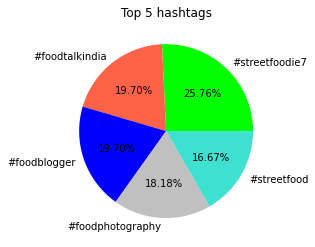

In [40]:
top_hash = []
freq = []
for h in hashtags[:5]:
    top_hash.append(h[1])
    freq.append(h[0])
    print(h[1],h[0])

plt.pie(freq, labels = top_hash, colors = ['lime','tomato','blue','silver','turquoise'], autopct = '%.2f%%')
plt.title('Top 5 hashtags')
plt.show()

# 3. You need to also calculate average followers : likes ratio for the obtained handles. Followers : Likes ratio is calculated as follows

### 3.1 Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [22]:
top_handles = ['food','foodtalkindia','food_lunatic','streetfoodie7','delhifoodguide']
top_handles

['food', 'foodtalkindia', 'food_lunatic', 'streetfoodie7', 'delhifoodguide']

In [23]:
def text_box(search_text):
    text_box = driver.find_element_by_class_name("XTCLo")
    text_box.clear()
    text_box.send_keys(search_text)

In [25]:
def open_profile(profile_name):
    text_box(profile_name)
    time.sleep(3)
    driver.find_element_by_class_name("-qQT3").click()

In [28]:
likes = []
for i in top_handles:
    open_profile(i)
    time.sleep(2)
    post = driver.find_element_by_class_name('_9AhH0')
    post.click()
    l = []
    print('Likes of InstaHandle :',i)
    print()
    for i in range(10):
        try:
            span = WebDriverWait(driver,3).until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"Nm9Fw")]/a/span')))
            l.append(span.text)
            print('Post ' + str(i+1) + " --->" + " " + span.text + " Likes")
            print()
            
        except:
            span = WebDriverWait(driver,3).until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"HbPOm")]/span/span')))
            l.append(span.text)
            print('Post ' + str(i+1) + " --->" + " " + span.text + " Views")
            print()
        next_post = driver.find_element_by_class_name('l8mY4')
        next_post.click()
    
    likes.append(l)
    print()
    print('----------------------------------------------------------------------------------------')
    print()
    close = driver.find_element_by_class_name('qJPeX')
    close.click()

Likes of InstaHandle : food

Post 1 ---> 555 Likes

Post 2 ---> 4,027 Views

Post 3 ---> 272 Likes

Post 4 ---> 10,599 Views

Post 5 ---> 8,555 Views

Post 6 ---> 12,004 Views

Post 7 ---> 1,026 Likes

Post 8 ---> 404 Likes

Post 9 ---> 333 Likes

Post 10 ---> 2,529 Likes


----------------------------------------------------------------------------------------

Likes of InstaHandle : foodtalkindia

Post 1 ---> 555 Likes

Post 2 ---> 4,027 Views

Post 3 ---> 272 Likes

Post 4 ---> 10,599 Views

Post 5 ---> 8,555 Views

Post 6 ---> 12,004 Views

Post 7 ---> 1,026 Likes

Post 8 ---> 404 Likes

Post 9 ---> 333 Likes

Post 10 ---> 2,529 Likes


----------------------------------------------------------------------------------------

Likes of InstaHandle : food_lunatic

Post 1 ---> 173 Likes

Post 2 ---> 602 Likes

Post 3 ---> 1,914 Likes

Post 4 ---> 725 Likes

Post 5 ---> 837 Likes

Post 6 ---> 3,855 Likes

Post 7 ---> 21,851 Likes

Post 8 ---> 4,746 Likes

Post 9 ---> 763 Likes

Post 10 

### 3.2 Calculate the average likes for a handle.


In [34]:
avg_likes = []
for i in range(5):
    like = likes[i]
    sum = 0
    for l in like:
        n = int(l.replace(',',''))
        sum += n
    avg = sum/10
    avg_likes.append(avg)
    print("Average likes on posts of InstaHandle " + top_handles[i] + " is " + str(avg))
    

Average likes on posts of InstaHandle food is 4030.4
Average likes on posts of InstaHandle foodtalkindia is 4030.4
Average likes on posts of InstaHandle food_lunatic is 3610.0
Average likes on posts of InstaHandle streetfoodie7 is 4970.8
Average likes on posts of InstaHandle delhifoodguide is 293.9


### 3.3 Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [36]:
top_handles = ['food','foodtalkindia','food_lunatic','streetfoodie7','delhifoodguide']
top_handles

['food', 'foodtalkindia', 'food_lunatic', 'streetfoodie7', 'delhifoodguide']

In [37]:
top_handles_followers = [307456, 307456, 124584, 118286, 99864]
top_handles_followers

[307456, 307456, 124584, 118286, 99864]

In [40]:
ratio = []
for i in range(5):
    r = avg_likes[i]/top_handles_followers[i]
    ratio.append(r)
    print('Ratio for InstaHandle ' + top_handles[i] + " : " + str(r))

Ratio for InstaHandle food : 0.01310886761032473
Ratio for InstaHandle foodtalkindia : 0.01310886761032473
Ratio for InstaHandle food_lunatic : 0.028976433570924037
Ratio for InstaHandle streetfoodie7 : 0.04202356999137683
Ratio for InstaHandle delhifoodguide : 0.002943002483377393


### 3.4 Create a bar graph to depict the above obtained information

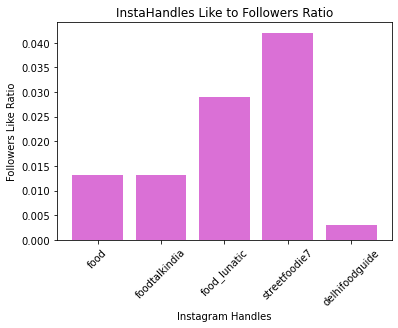

In [42]:
plt.bar(top_handles,ratio, color = "orchid" )
plt.xticks(rotation = 45)
plt.title("InstaHandles Like to Followers Ratio")
plt.xlabel("Instagram Handles")
plt.ylabel("Followers Like Ratio")
plt.show()